In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
%matplotlib inline

/tmp/ipykernel_19047/1326370596.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperature_df['hourly.time'] = pd.to_datetime(temperature_df['hourly.time'])
/tmp/ipykernel_19047/1326370596.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperature_df[f'{var}'] = scaler.fit_transform(temperature_df[f'{var}'].values.reshape(-1, 1))


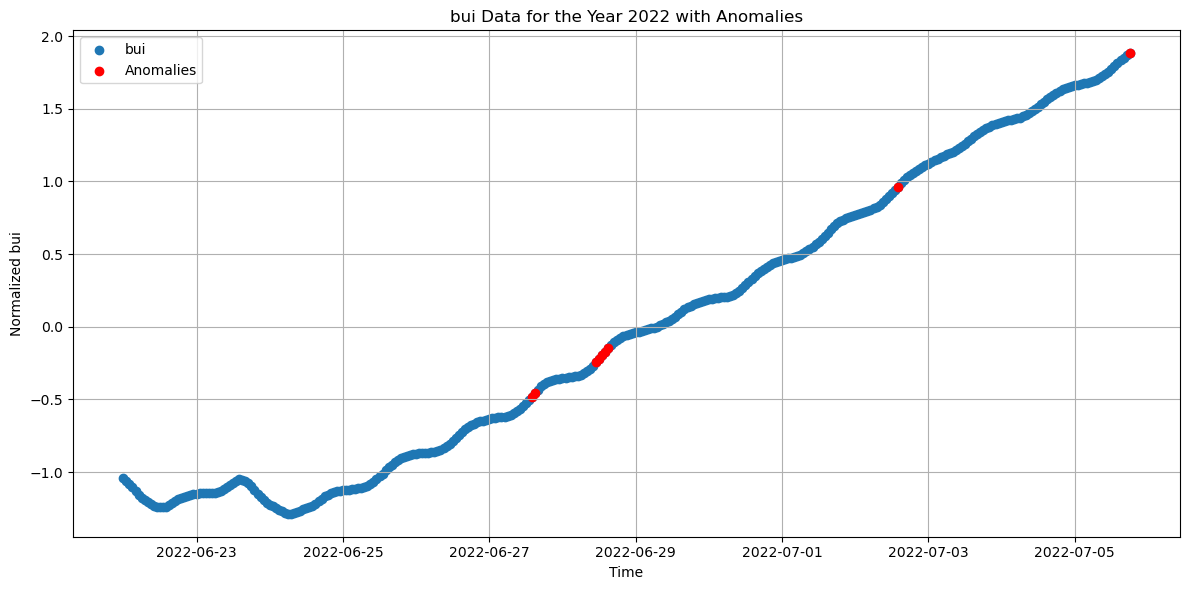

Anomalies for the year 2022:
                          bui
hourly.time                  
2022-06-27 14:00:00 -0.479886
2022-06-27 15:00:00 -0.456322
2022-06-28 11:00:00 -0.244865
2022-06-28 12:00:00 -0.220962
2022-06-28 13:00:00 -0.195884
2022-06-28 14:00:00 -0.171470
2022-06-28 15:00:00 -0.146905
2022-07-02 14:00:00  0.962976
2022-07-05 18:00:00  1.880823


In [90]:
pd2015 = pd.read_csv('source2/2022byHourFWIXFFMCFireHour.csv')


var = 'bui'
temperature_df = pd2015[['hourly.time', f'{var}']]

temperature_df['hourly.time'] = pd.to_datetime(temperature_df['hourly.time'])
temperature_df.set_index('hourly.time', inplace=True)


scaler = StandardScaler()
temperature_df[f'{var}'] = scaler.fit_transform(temperature_df[f'{var}'].values.reshape(-1, 1))

k = 5
knn = NearestNeighbors(n_neighbors=k)
distances, _ = knn.fit(temperature_df[f'{var}'].values.reshape(-1, 1)).kneighbors(temperature_df[f'{var}'].values.reshape(-1, 1))
mean_distances = distances.mean(axis=1)
z_scores = (mean_distances - mean_distances.mean()) / mean_distances.std()
anomaly_threshold = 2.0
anomalies = temperature_df[z_scores > anomaly_threshold]


plt.figure(figsize=(12, 6))
plt.scatter(temperature_df.index, temperature_df[f'{var}'], label=f'{var}')
plt.scatter(anomalies.index, anomalies[f'{var}'], c='red', label='Anomalies')
plt.xlabel('Time')
plt.ylabel(f'Normalized {var}')
plt.title(f'{var} Data for the Year 2022 with Anomalies')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f'Anomalies for the year 2022:')
print(anomalies)